In [1]:
#การใช้ Pabdas กับ Time Series
import pandas as pd
pd.to_datetime('2020-10-6') # เปลี่ยนวันที่(String) เป็น timestamp
# ใช้เคื่องหมาย / ในรูปแบบวันที่ และใช้รูปแบบ am pm กับเวลาได้ เวลาจะอยู่ในรูปแบบ hh:mm:ss
pd.to_datetime('2020/10/6 5:20pm')
pd.to_datetime('6 Oct 2020 5:20pm')
#รูปแบบข้อมูล วัน เดือน ค.ศ. เมื่อแปลงแล้ว จะเข้าสู่รูปแบบ ปี เดือน วัน
pd.to_datetime('10-6-2020') # วันที่จริงๆต้องเป็นเดือน 6 แบบไทย 10 เดือน 6 ปี 2020
# ต้องระบุว่าส่วนใดเป็นส่วนแรก
pd.to_datetime('10-6-2020', dayfirst = True)
pd.to_datetime('1-6-2020', format='%d-%m-%Y') # ใส่เครื่องหมายให้ตรงกันกับรูปแบบ
pd.to_datetime('1/6/2020',format='%d/%m/%Y')
#สามารถทำพร้อมกันได้ทีละหลายๆวัน จะได้ เทียบเท่ากับ List หรือ Numpy Array
pd.to_datetime(['2020-6-2','2020-6-3','2020-6-8'], format='%Y/%m/%d')
#pd.to_datetime('10-6-2563') #Error เพราะยังไม่รองรับพศ


DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-08'], dtype='datetime64[ns]', freq=None)

In [2]:
#ไฟล์ข้อมูลตัวอย่าง
#ใช้ชื่อไฟล์ opsd_germany_daily.csv เป็นการเก็บข้อมูลการใช้กระแสไฟฟ้า

# Date: วันเดือนปีที่บันทึกข้อมูล รูปแบบ yyyy-mm-dd
# Consumption: ปริมาณการใช้กระแสไฟฟ้า GWh
# Wind: ปริมาณการผลิตกระแสไฟฟ้าด้วยพลังงานลม
# Sola: ปริมาณการผลิตกระแสไฟฟ้าด้วยพลังงานแสงอาทิตย์
# Wind+Solar: ปริมาณกระแสไฟฟ้าด้วยพลังงานลมและพลังงานแสงอาทิตย์รวมกัน

#คำถาม
# ช่วงใดมีการใช้กระแสไฟฟ้าสูงสุด และต่ำสุด
# ปริมาณการผลิตกระแสไฟฟ้าด้วยพลังงานลม และแสงอาทิตย์ในช่วงเวลาต่างๆเป็นอย่างไร
# แนวโน้มการผลิตกระแสไฟฟ้าด้วยพลังงานลมและแสงอาทิตย์เป็นอย่างไร
# อัตราส่วนระหว่างการผลิตด้วยพลังงานลมและแสงอาทิตย์ เทียบกับการใช้เป็นอย่างไร

In [20]:
# Workshop 1 : อ่านข้อมูลและตรวจสอบเบื้องต้น
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('opsd_germany_daily.csv')
df.head()
df.tail()
df.sample(5)
df.describe()
df.shape
df.isnull().sum() # นับจำนวน missing data
# Date & Consumption จะไม่มี missing data


Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

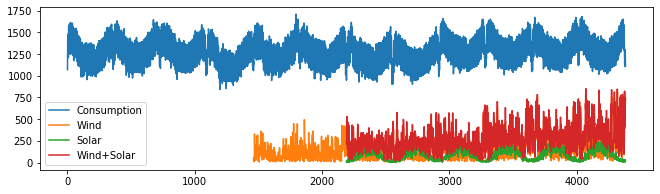

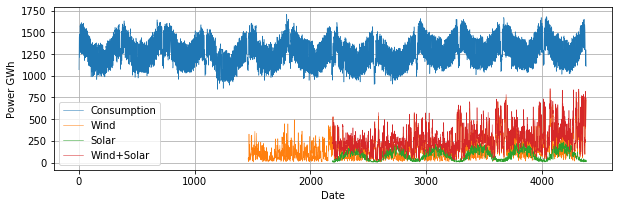

In [21]:
# Workshop 2 : พล็อตกราฟดูข้อมูลเบื้องต้น
plt.rcParams['figure.figsize'] = 11,3 # กำหนดขนาดกราฟด้วยวิธีนี้ก็ได้
plt.show()
df.plot() #เขียนกราฟเลยไม่กำหนดพารามิเตอร์
plt.show()
# lw กำหนดความกว้างเส้น 0.5 figsize กำหนดความกว้าง ความสูงกราฟ
df.plot(grid=True, lw=0.5, figsize=(10,3))
plt.xlabel('Date')
plt.ylabel('Power GWh')
plt.show()


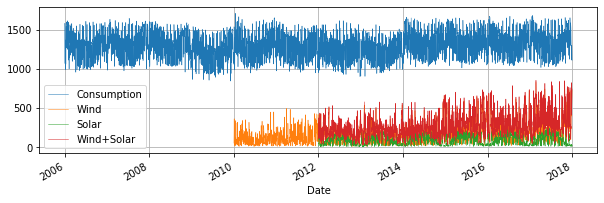

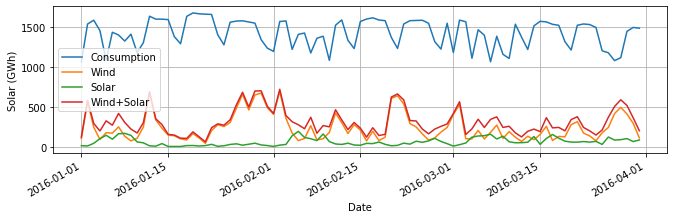

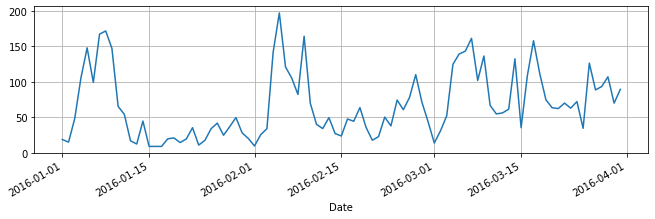

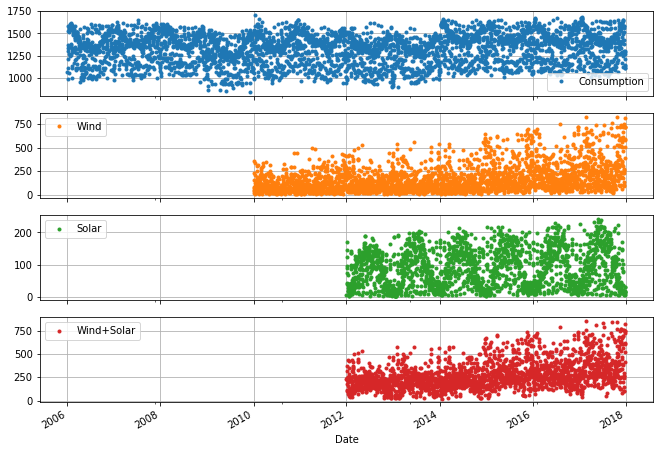

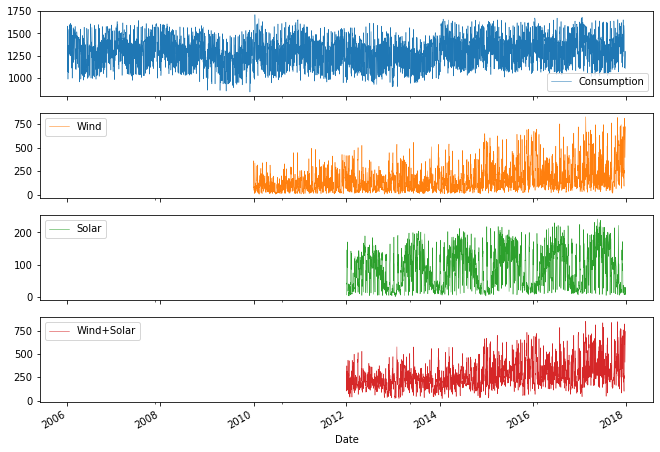

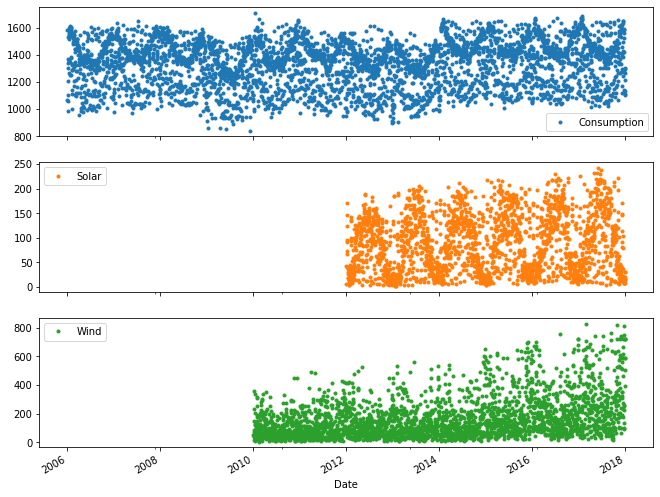

In [22]:
#Workshop 3 : เปลี่ยนเป็นข้อมูลวันที่
#ดังที่ได้กล่าวแล้วว่า Time series จะใช้ค่าวันที่ชนิด Timestamp เป็นค่าในแกน x โดยในชุดข้อมูลตัวอย่างที่นี้ คอลัมน์ Date ทำหน้าที่เก็บวันที่อยู่
# ตรวจสอบชนิดข้อมูล
df.dtypes # df.info() ก็ได้ date เป็น object
df.Date = pd.to_datetime(df.Date)
#df.Date = pd.to_datetime(df.Date, format='%Y-%m=%d') #กำหนดรูปแบบ
df.head() 
df.dtypes # Date object -> datetime64[ns] แล้ว

df.set_index('Date', inplace=True) # เปลี่ยนให้ Date เป็น index ของ DataFrame
df.head() 
# จะเห็นว่า หลังการเปลี่ยนแล้วตัวเลข index 0 1 2 ... 4382 เปลี่ยนเป็น Date แทน(เปลี่ยนเป็นindex)
# เราก็จะสามารถ ค้นหา การรวมค่า การหาค่าเฉลี่ย ช่วงวันได้ง่าย
df.shape
df.dtypes
# ดูค่า index ของ 10 แถว (10 Rows) แรก
df.index[:10] # จะได้ส่า DatetimeIndex จะเป็น Timestamp

# พล็อตกราฟด้วยคำสั่งเดิมอีกครั้ง จะพบว่าแกน X ตอนนี้กำกับด้วยแกน Date แล้วแต่ขณะนี้ยังแสดงเพียงเลขปี เนื่องจากมีข้อมูลมากเกินไป
df.plot(grid=True, lw=0.5, figsize=(10,3))
plt.show()
# เลือกช่วงเดือน 1-3 ในปี2016
df.loc['2016-1':'2016-3'].plot(grid=True) # กำหนดรูปแบบช่วงปีคศ.-เดือน
plt.ylabel('Solar (GWh)') ;
plt.show()
# จะได้กราฟที่แกน x บอก ปี เดือน วัน 
# ถ้าต้องการแยกคอลัมน์
df.Solar.loc['2016-1':'2016-3'].plot(grid=True)
df.plot(marker='.',linestyle='None',figsize=(11,8), subplots=True, grid=True)
# grid หมายถึงแสดงตารางกริด
df.plot(lw=0.5, figsize=(11,8), subplots=True) #พล็อตลงเส้นไม่พล็อตจุด
plt.show()
# ต้องการแค่บางคอลัมน์
cols_plot = ['Consumption','Solar','Wind'] # คอลัมน์ที่สนใจ
df[cols_plot].plot(marker='.',linestyle='None', figsize = (11,9), subplots =True)
plt.show()


In [23]:
# Workshop 4 : การกำหนดเวลา
# ช่วงเวลาที่ต้องการเลือก ทำได้ 2แบบ  1. ระบุหรือกำหนดเวลาโดยตรง 2. ระบุช่วงเวลา
# ระบุเวลาโดยตรง
# ถ้าต้องการข้อมูล ณ เวลาใด ใช้ .loc() แล้วระบุวันเวลานั้นโดยตรง (เนื่องจากเราใช้ข้อมูล วันเวลา เป็น index อยู่แล้ว)
df.loc['2017-1-5'] # ต้องการข้อมูลของวันที่ 5 ม.ค. 2017 ระบุ timestamp หลัง loc ได้เลย
# ในข้อมูลที่ดึงมาจะมี Series ย่อยๆเป็นเวลาในวันนี้ด้วย
#df.loc['2017-1'] # ข้อมูลในเดือน 1 ปี 2017 
#df.loc['2017'] # ข้อมูลในปี2017
#df.loc['2017'].count() # จำนวนข้อมูลในปี2017
#df.loc['2017'].head() # ดูข้อมูลส่วนหัว

# ระบุช่วงเวลา
# df.loc['วันเวลาเริ่มต้น':'วันเวลาสิ้นสุด']
#df.loc['2017-1-1':'2017-1-5']
# กำหนดเวลาเริ่มต้นและระยะเวลา
# วิธีการคือใช้ .date_range() กำหนดวันเวลาเริ่มต้น ระยะเวลา (Periods) และระบุความถี่ว่า
# ต้องการระยะเวลา ชม('h') เดือน ('m') วัน ('d') 
date_range = pd.date_range('2017-1-1', periods=5, freq='d') #เริ่มตั้งแต่ 2017-1-1 ระยะเวลา 5 หน่วยเป็น วัน
df.loc[date_range]

,Consumption,Wind,Solar,Wind+Solar
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1627.965,221.296,23.817,245.113
2017-01-03,1551.410,463.541,55.172,518.713
2017-01-04,1186.056,82.512,144.801,227.313
2017-01-05,1103.225,440.713,119.738,560.451


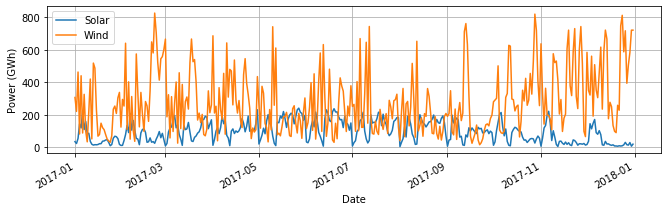

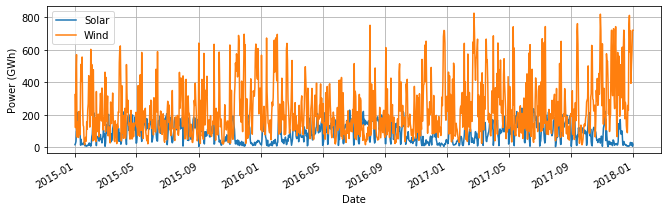

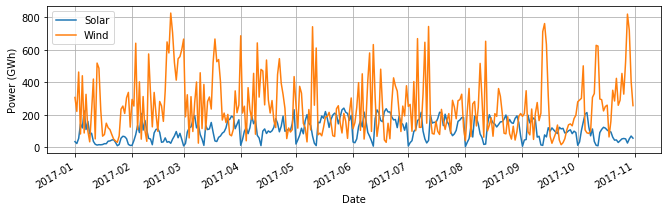

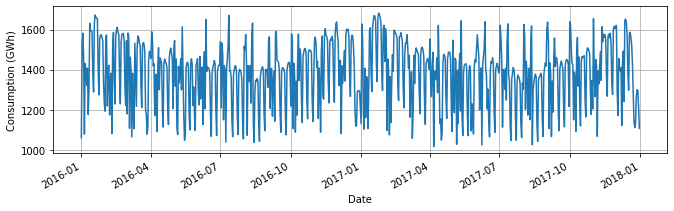

In [24]:
# Workshop 5 : พล็อตกราฟช่วงเวลา
#การกำหนดชวงเวลาที่จะพล็อตข้อมูล
cols_plot = ['Solar','Wind']
df[cols_plot].loc['2017'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()
#จากกราฟ
# Solar ผลิตกระแสไฟฟ้าได้มากช่วงกลางปี ซึ่งช่วงดังกล่าวจะผลิตไฟฟ้าจาก Wind ได้น้อย คาดว่า แดดแรง ลมอ่อน
# Wind ผลิตกระแสไฟฟ้าได้มากช่วงต้นปีและปลายปี ซึ่งช่วงดังกล่าวจะผลิตไฟฟ้าจาก Solar ได้น้อย คาดว่า แดดอ่อน ลมแรง

# ดูย้อนหลังในช่วง 2 ปีก่อน
cols_plot = ['Solar','Wind'] # ข้อมูลที่สนใจ
df[cols_plot].loc['2015':'2017'].plot(grid=True) # ช่วงปี
plt.ylabel('Power (GWh)');
plt.show()
#สรุปคือย้อนหลัง 2 ปีมีแนวโน้มใกล้เคียงกับปี 2017

# กราฟช่วง เดือน 1-10 ปี 2017
cols_plot = ['Solar','Wind']
df[cols_plot].loc['2017-1':'2017-10'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()

# ช่วง 2 ปี 2016-2017
df.Consumption.loc['2016':'2017'].plot(grid=True)
plt.ylabel('Consumption (GWh)');
plt.show()



In [25]:
# การหาค่าเฉลี่ยและกรารวม
# เมื่อมีข้อมูลจำนวนมาก และบวกกับการกระเพื่อมขึ้นลงดังตัวอย่าง เส้นกราฟอาจแน่นจนแทบดูไม่ออก หากต้องการลดแรงกระเพื่อมนี้โดยการหาค่าเฉลี่ย
# Rolling: นำข้อมูลในช่วงเวลาหนึ่งมาหาค่าเฉลี่ย เช่น ข้อมูลมาเฉลี่ยรายสัปดาห์(7วัน)มาเฉลี่ยกันแล้วแทนค่าที่center
#df.rolling(7, center=True).mean() # นำค่า 7 วัน มาเฉลี่ยแล้วแปะกลาง
#df.rolling(7,center=True).sum() # นำค่า 7 วัน มารวมแล้วแปะกลาง
#Resample: นำข้อมูลในช่วงเวลาหนึ่งมาหาค่าเฉลี่ยเหมือนกัน แต่จำนวนข้อมูลจะเพิ่มลดตามกำหนด เช่น 7 วัน พอเฉลี่ยแล้วจะลดเหลือ 1 แถว 7 rows-> mean -> ยุบเหลือ 1 Row
#df.resample('7d').mean() # นำ7วันมาเฉลี่ยแล้วยุบ
#df.resample('1w').mean() # นำ 1 สัปดาห์มาเฉลี่ย
#df.resample('1m').sum() # นำ 1 เดือนมารวม

#Workshop 6 : เฉลี่ยข้อมูลด้วย Rolling

start, end = '2017-12-1','2017-12-7'   #กำหนดช่วงเวลา เริ่มต้น,สิ้นสุด ที่ต้องการเฉลี่ย
columns = ['Consumption','Wind','Solar'] #กำหนดคอลัมน์ที่ต้องการ
df[columns][start:end].round(1) # ลิสต์ดูข้อมูลกำหนดทศนิยม 1หลัก

df_weekly_roll =df[columns].rolling(7, center=True).mean()
df_weekly_roll[start:end].round(1)


df[columns][start:end].mean().round(1)
df[columns][start:end].mean().round(1) #ดูค่าเฉลี่ย 1-7 dec ใช้ pandas
df.shape
df_weekly_roll
# rolling ลดการแกว่งหรือการกระเพื่อมของข้อมูล โดยที่จำนวนแถวภายหลังการคำนวณ Rolling ยังคงเท่าเดิม

,Consumption,Wind,Solar
Date,,,
2006-01-01,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN
2006-04-01,1361.471429,NaN,NaN
2006-05-01,1381.300143,NaN,NaN
...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143
2017-12-28,1203.265211,604.699143,19.240143
2017-12-29,NaN,NaN,NaN


In [26]:
# Workshop 7 : เฉลี่ยและรวมด้วย Resample

df_weekly_resampling = df[columns].resample('7d').mean()
df_weekly_resampling.round(1).tail()
df_weekly_resampling.shape
#เมื่อเทียบระหว่าง Resample Vs Rolling จะพบว่า
#Resample : จำนวนแถวลดลง เหลือเพียง 627 นั่นคือ Pandas ทำการเฉลี่ยค่าแล้วยุบตามที่เรากำหนด ในที่นี้ยุบ 7d เหลือ 1 ข้อมูล จะได้จำนวน 627=4383/7
#Resample : ค่าเฉลี่ยจะได้ใกล้เคียงกับ Rolling สังเกต วันที่ 3-12-2017 ค่าใกล้เคียงกันวันที่ 4 ของ Rolling

#การใช้งานจริง
# Rolling ใช้หาค่าเฉลี่ยสำหรับลดยอดแหลม ทำให้เส้นกราฟราบเรียบขึ้น (Smooth) ทางบเทคนิคกล่าวได้ว่าเป็นการลดสัญญาณรบกวน Noise
# Resample ใช้สำหรับสรุปหาค่าเฉลี่ยหรือผลรวมในช่วงเวลาที่สนใจ เช่น รายวัน รายเดือน

df_weekly_sampling = df[columns].resample('m').sum()
df_weekly_sampling
#ตรวจสอบโดยเทียบกับการสั่งรวมในเดือนที่ต้องการ
start, end = '2017-12-1','2017-12-31'
df[columns][start:end].sum().round(1)
#ข้อดีคือทำให้เราได้รวมยอดรายเดือนแบบสั้นๆไม่ต้องไล่รวมในExcelวุ่นวาย สามารถสั่งรวม 'w','2w'(2week),'q','y'

Consumption    42734.7
Wind           13780.8
Solar           1329.3
dtype: float64

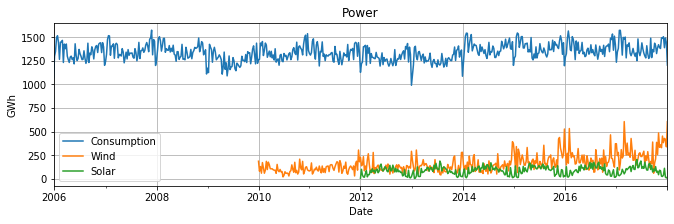

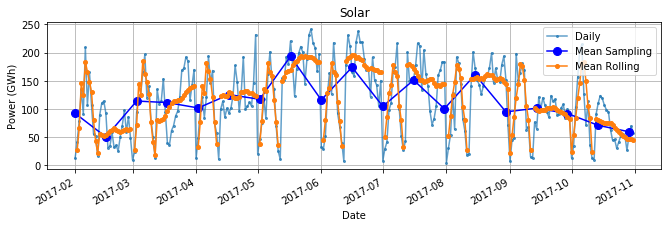

In [28]:
#Workshop 8 : พล็อตกราฟ Resample และ Rolling

df_resampling = df[columns].resample('1w').mean() #resample รายสัปดาห์

df_resampling.plot(grid=True) # พล็อตกราฟ
plt.ylabel('GWh');
plt.title('Power')
plt.show()
# จะเห็นแนวโน้มได้ชัดเจนว่ากราฟ Workshop 2 ที่ยังไม่ได้คำนวณ resample มาก
# ตัวอย่างพล็อตเทียบกันระหว่าง 1) ค่าจริงปกติ 2)Resample 3) Rolling
start, end = '2017-2','2017-10' # ช่วงเดือน 2 - เดือน 10 ปี 2017
df.Solar.loc[start:end].plot(marker='o', label='Daily',markersize =2, alpha=0.7)
df.Solar.loc[start:end].resample('15d').mean().plot(marker='o',c='blue',
                                                   markersize=8, label='Mean Sampling')
df.Solar.loc[start:end].rolling(15, center=True).mean().plot(marker='o',
                                                            markersize=4, label='Mean Rolling')
plt.ylabel('Power (GWh)');
plt.title('Solar')
plt.legend()
plt.grid()
plt.show()

#alpha คือ ค่าความโปร่ง ความเข้มของเส้น (0-1 ค่าต่ำสีโปร่ง ค่าสูงสีเข้มข้น)
#c คือสี เช่น 'b' คือ blue 'c' คือ cyan 'y' คือ yellow 'r' คือ red
# marker คือ จุดมาร์คตำแหน่งข้อมูล เช่น 'o' คือจุดกลม
# markersize คือขนาด marker
# label คือข้อความกำกับเส้นกราฟ

# จากกราฟ สรุปได้ว่าช่วงกลางปี สามารถผลิตกระแสไฟฟ้าด้วยพลังงานแสงอาทิตย์(Solar) ได้มากกว่าช่วงต้นปีและปลายปี
# ข้อสังเกตเรื่องกราฟ
# กราฟของข้อมูลจริงมียอดแหลม เนื่องจากมีการบันทึกข้อมูลรายวัน เกิดการแกว่งของข้อมูล
# Rolling and Resample จะทำการเฉลี่ยข้อมูล ทำให้ยอดแหลมลดลง เหมาะสำหรับการดูแนวโน้ม หรือการลด Noise โดยเฉพาะในกรณีอ่านค่าสัญญาณเซ็นเซอร์ 
# Resample เส้นจะมีลักษณะเป็นหยักๆ เหลี่ยมๆ มากกว่า Rolling เนื่องจากจำนวนแถวข้อมูล ถูกยุบลดลงตามที่ระบุ เช่นยุบจาก '15d' เหลือ 1 ข้อมูล

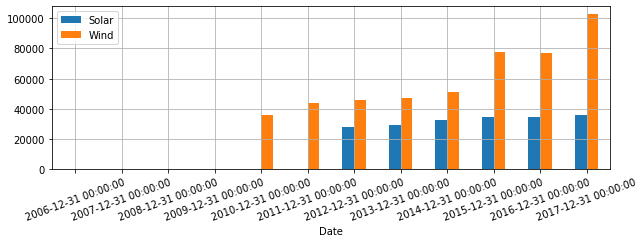

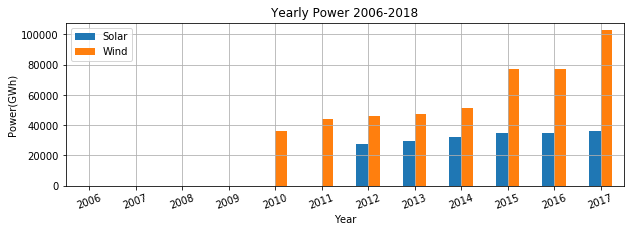

In [30]:
#Workshop 9 : กราฟแท่งกับข้อมูล Time Series

# ข้อมูล Time series นอกจากพล็อตดูกราฟเส้นแล้ว ยังสามารถพล็อตกราฟแท่งได้ จะใช้แบบ datetime
# ต้องการแสดงกราฟยอดรวมการผลิตไฟฟ้ารายปีของ Solar และ Wind ดังนี้

columns = ['Solar','Wind']
yearly = df[columns].resample('y').sum() # Resample Sum รวมข้อมูลรายปี

yearly.plot(kind='bar', figsize=(10,3), rot=20) # หมุนข้อความแกน x 20 องศา
plt.grid()
plt.show()
# แกน x จะเป็นเดือนวัน และเวลา แต่เวลา จะเป็น 00:00:00 เนืองจากข้อมูลที่บันทึก เป็นข้อมูลรายวัน ไม่ได้ระบุเวลา ถ้าต้องการให้ดูสวยงาม
# เราจะต้องตัดเลขเวลาออกไป โดยใช้วิธีปรับแต่งรูปแบบแสดงข้อมูลที่แกนx
# การปรับแต่งรูปแบบแสดงที่แกน X ทำได้โดยใช้ฟังก์ชัน map มาช่วย หลักการคือส่งค่า date-time (ที่เป็น index) เข้าฟังก์ชันแล้วตัดให้เหลือเท่าที่ต้องการ ตัวอย่างนี้ให้แสดงเพียงเลข

# ค่า yearly ใช้ของ Workshop ก่อนหน้า

def x_label(datetime):
    lb = str(datetime.year) # + '/' + str(datetime.month) ถ้าต้องการให้มีเลขเดือน
    return lb

ax = yearly.plot(kind='bar', figsize=(10,3), rot=20)
ax.set_xticklabels(map(lambda x:x_label(x), yearly.index))
ax.set(xlabel="Year",ylabel="Power(GWh)")
ax.set(title="Yearly Power 2006-2018")
plt.grid()
plt.show()
# จะได้กราฟที่ค่าแกน X แสดงเพียงค่าเลขปีเท่านั้น ทำให้ดูง่ายขึ้น ไม่แน่นจนเกินไป (กราฟแสดงข้อมูลรายปี ก็ไม่จำเป็นต้องแสดงเลขเดือนกำกับ)


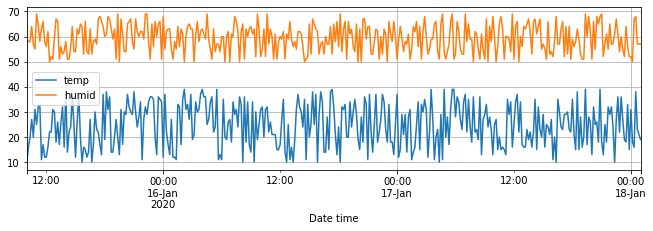

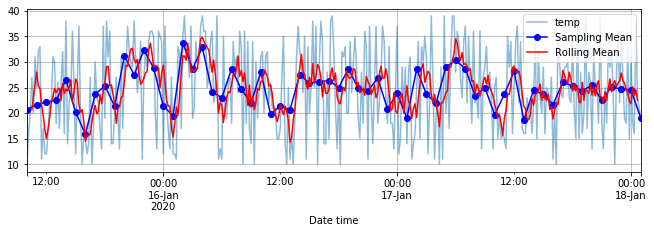

In [3]:
# Workshop 10 : ข้อมูล Time Series ที่มีค่าเวลา

import pandas as pd
import numpy as np

range = pd.date_range('2020-01-1','2020-2-28',freq='10min') # สร้างข้อมูลวันเวลา
df = pd.DataFrame(index =range)

df['temp'] = np.random.randint(low=10, high=40, size=df.shape[0])
                                               # หรือใช้ size=len(df.index)
df['humid'] = np.random.randint(low=50, high=70,size=df.shape[0]) # humid
df.reset_index(inplace=True)
df.columns = ['time','temp','humid']
df.shape
# ค่าจะถูกเก็ยทุกๆ 10 นาที
df.time = pd.to_datetime(df.time) # เปลี่ยนข้อมูลคอลัมน์ time ให้เป็นชนิด Timestamp
df.dtypes
# เปลี่ยนคอลัมน์ time ให้เป็น index ของ DataFrame
df.set_index('time',inplace=True)
#เมื่อต้องการข้อมูลช่วงใด สามารถระบุ วัน เดือน ปี และ เวลา ได้เลยเช่น ต้องการข้องมูลของวันที่ 15/1/2020
df.loc['2020-01-15'].head()
# จะได้ข้อมูลของวันดังกล่าวสังเกตว่าเราระบุแค่วัน แต่จะแสดงข้อมูล ณ เวลาต่างๆ ในวันดังกล่าวด้วย(ข้อมูล 10 นาที)เนื่องจากเป็นข้อมูลของวันที่ระบุนั่นเอง จึงนับรวมหมด
chk_time = pd.to_datetime('2020-1-18 3pm')
chk_time = '2020/1/18 15.00'
chk_time = '2020-1-18 15:00'
df.loc[chk_time] # จะได้ข้อมูล เวลา 15.00น. ของวันที่ 18/1/2020
df.loc['2020-1-1 9:00':'2020-1-1 9:30'] # หรือจะใช้รูปแบบ pm ก็ได้

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 11,3 # กำหนดขนาดกราฟ

start = pd.to_datetime('2020-1-15 10:00') # วันเวลาเริ่มต้น
end = pd.to_datetime('2020-1-18 1:00') # วันเวลาสิ้นสุด

df.loc[start:end].plot(grid=True)
plt.xlabel('Date time')
plt.show()

# สามารถใช้ Resample or Rolling คำนวณหาค่าเฉลี่ยได้ เช่น ต้องการกราฟเฉลี่ยรายชั่วโมง

# ใช้ rolling โดยจำนวนค่า Rolling = 6 คือนำ 6 ข้อมูลมาเฉลี่ยกัน ซึ่งในที่นี้ แต่ละข้อมูลห่างกัน 10 นาที ดังนั้น Rolling 6 ก็คือ 1 ชั่วโมง
# ใช้ resample('1h') คือเฉลี่ยทุก 1 ชม ดังนั้นกราฟ 2วิธีนี้จะใกล้เคียงกัน

df_temp = df.temp.loc[start:end] # ช่วงวันเวลา temp
df_sampling = df.temp.loc[start:end].resample('1h').mean() #Resample
df_rolling = df.temp.loc[start:end].rolling(6,center=True).mean() #Rolling

df_temp.plot(grid=True, alpha=0.5)  # plot temp ค่าปกติ
df_sampling.plot(c='b', marker='o',label='Sampling Mean') # plot temp Resample
df_rolling.plot(c='r',label='Rolling Mean',grid=True) #plot temp Rolling
plt.xlabel('Date time')
plt.legend()
plt.savefig('timeseries06-datetime.png', dpi=120)
plt.show()



In [27]:
#Workshop 11 : ข้อมูลปี พ.ศ.
uri = 'date-Th.csv'
df = pd.read_csv(uri)
df.head()
df.dtypes # date จะเป็น object ถ้าเปลี่ยน date เป็น timeseies จะเกิด error เพราะเป็นปีพศ
#pd.to_datetime(uri) # error
# แก้โดย แยกวันเดือนปีด้วย .str.split()
df['D'] = df.Date.str.split('/', expand=True)[0]   # แยกด้วย/ แล้วมาเก็บไว้
df['M'] = df.Date.str.split('/', expand=True)[1]
df['Y'] = df.Date.str.split('/', expand=True)[2] # แยกเก็บเป็นstr แล้วจะเปลี่ยนเป็น int จากนั้น -543

df.Y = df.Y.astype(int) # คอลัมน์ Y ให้เปลี่ยนเป็น int
df['Y'] = df['Y']-543
df.Y = df.Y.astype('str') #เปลี่ยนกลับเป็น str
# รวมให้ได้รูปแบบ yyy-mm-ddd แล้วเก็บในคอมลัน์ Date2
df['Date2'] = df.Y+'-'+df.M+'-'+df.D
df
df.drop(columns=['D','M','Y'],inplace=True) # ลบคอลัมน์ D M Y ออก

#ฟังก์ชันเปลี่ยน พศ เป็น คศ
def get_datetime_En(sc):
    return str(int(sc.split('/')[2])-543)+'-'+sc.split('/')[1]+'-'+sc.split('/')[0]
df['Date2'] = df.Date.apply(get_datetime_En).head()
df.head()
df.dtypes # date2 เป็น obj อยู่
df.Date2 = pd.to_datetime(df.Date2) # เปลี่ยนเป็น datetime(time stamp)
df.set_index('Date2',inplace=True) # ใช้คอลัมน์ Date2 เป็น index
df
df.loc['2017']
df.loc['2018-12']

,Name,Age,Score,Date
Date2,,,,
2018-12-11,Tim,35,29,11/12/2561
2018-12-21,Steal,32,27,21/12/2561
